#### 1. 앙상블 학습의 대표적인 학습 방법 3가지와 그 방법들 사이의 차이점을 서술하시오. 

1) 보팅(Voting) : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정. 서로 다른 알고리즘을 가진 분류기를 결합.
2) 배깅(Bagging) : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정. 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게 가져가면서 학습 수행.
3) 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게 가중치(weight)를 부여하며 학습과 예측 진행.

#### 2. 보팅(Voting)의 유형 두가지와 그 들의 차이점을 서술하시오.

1) 하드 보팅(Hard Voting) : 예측한 결괏값중 다수의 분류기가 결정한 예측삽을 최종 보팅 결괏값으로 선정.
2) 소프트 보팅(Soft Voting) : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정.

#### 3. 랜덤포레스트(Random Forest)의 결과 에측 과정을 간략하게 설명하시오.

여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링(부트스트래핑 분할 방식)
개별적으로 학습을 수행
모든 분류기가 보팅을 통해 예측 결정
부트스트래핑(bootstrapping) : 여러 개의 데이터 세트를 중첩되게 분리하는 것

#### 4. GBM(Gradient Boosting Machine) 알고리즘에 대해 간단히 설명하시오.

여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 나가면서 학습.
경사 하강법(Gradient Descent)을 통해 가중치 업데이트.

#### 5. XGBoost(eXtra Gradient Boost) 알고리즘애 대해 간략하게 설명하고 GBM 대비 이 알고리즘의 장점에 대해 서술하시오.

GBM 기반 알고리즘으로, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제 개선.
병렬 CPU 환경에서 병렬 학습이 가능해 GBM보다 빠르게 학습.
과적합 규제(Regularization)기능으로 과적합에 좀 더 강한 내구성.
Tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기 해 분할 수를 더 줄임.
내부적으로 교차 검증을 수행해 최적화된 반복 수행 횟수를 가짐.
결손값을 자체 처리.

#### 6. LightGBM 알고리즘애 대해 간략하게 설명하고 XGBoost 대비 이 알고리즘의 장점에 대해 서술하시오.

일반 GBM 계열의 트리 분할 방법과는 다른 리프 중심 트리 분할(Leaf Wise) 방식 사용.
최대 손실 값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리 생성.
예측 오류 손실 최소화.
메모리 사용량이 상대적으로 적음.

#### 7. (Coding Part) titanic.csv 데이터를 기반으로 타이타닉호 승객 생존률을 예측하는 모델을 만들고자 한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./titanic.csv')
df.head(3)

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,1,38.0,1,0,71.2833,1,0
2,2,1,3,1,26.0,0,0,7.9250,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  684 non-null    int64  
 1   Survived    684 non-null    int64  
 2   Pclass      684 non-null    int64  
 3   Sex         684 non-null    int64  
 4   Age         684 non-null    float64
 5   SibSp       684 non-null    int64  
 6   Parch       684 non-null    int64  
 7   Fare        684 non-null    float64
 8   Embarked_C  684 non-null    int64  
 9   Embarked_S  684 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 53.6 KB


In [4]:
df.describe()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,449.004386,0.409357,2.217836,0.361111,29.705658,0.504386,0.434211,35.234563,0.190058,0.809942
std,258.175587,0.492075,0.838794,0.480674,14.395901,0.904671,0.848769,53.732565,0.392634,0.392634
min,0.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,0.000000,1.000000
50%,446.500000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.875000,0.000000,1.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,34.375000,0.000000,1.000000
max,889.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,0
2,1,3,1,26.0,0,0,7.9250,0,1


#####       (a) 생존률과 다른 independent variables 간의 상관관계를 나타내시오. 생존률과 가장 correlation이 높은 두가지 variables은 무엇인가?

In [7]:
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
Survived,1.000000,-0.358252,0.537850,-0.078109,0.002539,0.110149,0.269099,0.195391,-0.195391
Pclass,-0.358252,1.000000,-0.159075,-0.370803,0.065305,0.021188,-0.548387,-0.272602,0.272602
Sex,0.537850,-0.159075,1.000000,-0.093690,0.136081,0.257490,0.189780,0.109041,-0.109041
Age,-0.078109,-0.370803,-0.093690,1.000000,-0.294998,-0.195875,0.094261,0.037348,-0.037348
SibSp,0.002539,0.065305,0.136081,-0.294998,1.000000,0.395079,0.139397,-0.043570,0.043570
Parch,0.110149,0.021188,0.257490,-0.195875,0.395079,1.000000,0.209702,-0.010752,0.010752
Fare,0.269099,-0.548387,0.189780,0.094261,0.139397,0.209702,1.000000,0.298283,-0.298283
Embarked_C,0.195391,-0.272602,0.109041,0.037348,-0.043570,-0.010752,0.298283,1.000000,-1.000000
Embarked_S,-0.195391,0.272602,-0.109041,-0.037348,0.043570,0.010752,-0.298283,-1.000000,1.000000


In [8]:
corr_sort = corr.sort_values(by=['Survived'], ascending=False)


생존률과 가장 correlation이 높은 varialbes:
 Sex     0.537850
Fare    0.269099
Name: Survived, dtype: float64


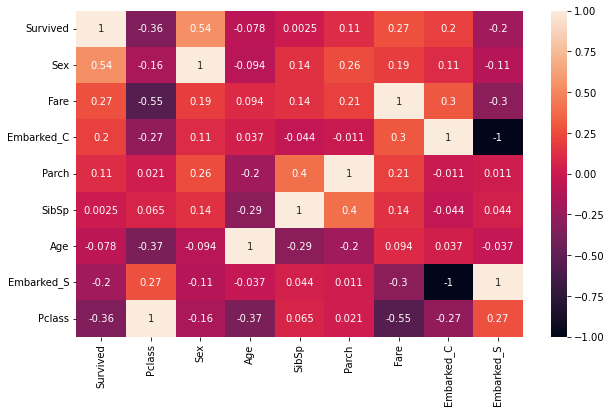

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_sort, annot=True)
print('생존률과 가장 correlation이 높은 varialbes:\n',corr_sort['Survived'][1:3] )

#####       (b) Random Forest 알고리즘을 통해 생존률을 예측하고 모델의 정확도를 나타내시오

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [11]:
X_df = df.drop('Survived', axis=1)
y_df = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=156)

rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('랜덤 포레스트 정확도 :{0:.4f}'.format(accuracy_score(y_test, pred)))

랜덤 포레스트 정확도 :0.7883


#####       (c) GridSearchCV를 사용하여  최적의 hyper-parameter를 가진 모델을 생성하고 그 모델의 최고 예측 정확도를 나타내시오.

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]}

rf_clf = RandomForestClassifier(random_state=156, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7916


In [14]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=156)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.7591


#####       (d) bar plot을 사용하여 feature importance를 나타내시오.

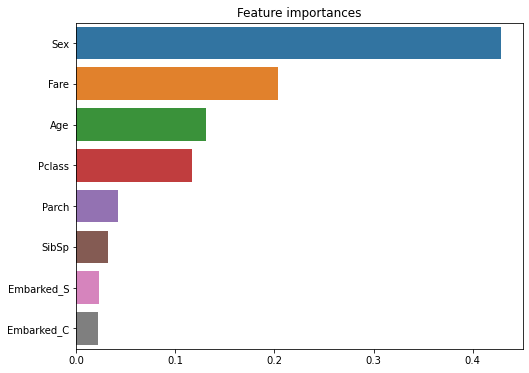

In [16]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr , y = ftr.index)
plt.show()

#####       (e) XGBoowst 래퍼를 사용하여 생존율을 예측하고 그 모델의 정확도를 나타내시오

In [24]:
# 파이썬 래퍼 XGBoost
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 'early_stoppings':100}
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)


[04:11:15] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64408	eval-logloss:0.65302
[1]	train-logloss:0.60373	eval-logloss:0.62043
[2]	train-logloss:0.57018	eval-logloss:0.59558
[3]	train-logloss:0.54188	eval-logloss:0.57324
[4]	train-logloss:0.51793	eval-logloss:0.55593
[5]	train-logloss:0.49755	eval-logloss:0.54053
[6]	train-logloss:0.48009	eval-logloss:0.52919
[7]	train-logloss:0.46508	eval-logloss:0.51931
[8]	train-logloss:0.45218	eval-logloss:0.50990
[9]	train-logloss:0.44099	eval-logloss:0.50117
[10]	train-logloss:0.43129	eval-logloss:0.49618
[11]	train-logloss:0.42285	eval-logloss:0.48930
[12]	train-logloss:0.41549	eval-logloss:0.48489
[13]	train-logloss:0.40872	eval-logloss:0.48030
[14

In [27]:
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]

print('정확도: {0:.4f}'.format(accuracy_score(y_test, preds)))

정확도: 0.7956


In [ ]:
# 사이킷런 래퍼 XGBoost

In [29]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth =3)
evals=[(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.65302
[1]	validation_0-logloss:0.62043
[2]	validation_0-logloss:0.59558
[3]	validation_0-logloss:0.57324
[4]	validation_0-logloss:0.55593
[5]	validation_0-logloss:0.54053
[6]	validation_0-logloss:0.52919
[7]	validation_0-logloss:0.51931
[8]	validation_0-logloss:0.50990
[9]	validation_0-logloss:0.50117
[10]	validation_0-logloss:0.49618
[11]	validation_0-logloss:0.48930
[12]	validation_0-logloss:0.48489
[13]	validation_0-logloss:0.48030
[14]	validation_0-logloss:0.47819
[15]	validation_0-logloss:0.47601
[16]	validation_0-logloss:0.47423
[17]	validation_0-logloss:0.47337
[18]	validation_0-logloss:0.47218
[19]	validation_0-logloss:0.47090
[20]	validation_0-logloss:0.47023
[21]	validation_0-logloss:0.47014
[22]	validation_0-logloss:0.46972
[23]	validation_0-logloss:0.46965
[24]	validation_0-logloss:0.47017
[25]	validation_0-logloss:0.46979
[26]	validation_0-logloss:0.46820
[27]	validation_0-logloss:0.46724
[28]	validation_0-logloss:0.46735
[29]	validation_0-loglos

In [30]:
print('정확도 :{0:.4f}'.format(accuracy_score(y_test, preds)))

정확도 :0.8175
